In [201]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machinelearning/musteriler.txt
/kaggle/input/machinelearning/veriler.txt
/kaggle/input/machinelearning/Churn_Modelling.txt
/kaggle/input/machinelearning/Restaurant_Reviews.txt
/kaggle/input/machinelearning/maaslar_yeni.txt
/kaggle/input/machinelearning/maaslar.txt
/kaggle/input/machinelearning/odev_tenis.txt
/kaggle/input/machinelearning/eksikveriler.txt
/kaggle/input/machinelearning/sepet.txt
/kaggle/input/machinelearning/Wine.txt
/kaggle/input/machinelearning/satislar.txt
/kaggle/input/machinelearning/Iris.xls


In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os
df=pd.read_csv("/kaggle/input/machinelearning/Churn_Modelling.txt")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [203]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [204]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [206]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [207]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [208]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [209]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [210]:
only_female = df[df['Gender'] == 'Female']
only_female.value_counts



<bound method DataFrame.value_counts of       RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
0             1    15634602     Hargrave          619    France  Female   42   
1             2    15647311         Hill          608     Spain  Female   41   
2             3    15619304         Onio          502    France  Female   42   
3             4    15701354         Boni          699    France  Female   39   
4             5    15737888     Mitchell          850     Spain  Female   43   
...         ...         ...          ...          ...       ...     ...  ...   
9982       9983    15768163      Griffin          655   Germany  Female   46   
9991       9992    15769959  Ajuluchukwu          597    France  Female   53   
9994       9995    15719294         Wood          800    France  Female   29   
9997       9998    15584532          Liu          709    France  Female   36   
9999      10000    15628319       Walker          792    France  Female   28   


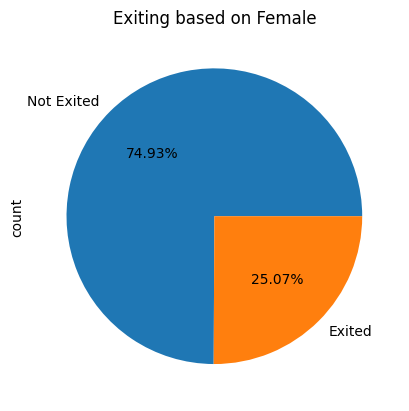

In [211]:
only_female = df[df['Gender'] == 'Female']
female_exits = only_female['Exited'].value_counts()
labels = ['Not Exited', 'Exited']
female_exits.plot(kind="pie", autopct='%.2f%%', labels=labels, title="Exiting based on Female")
plt.show()


In [212]:
only_male = df[df['Gender'] == 'Male']

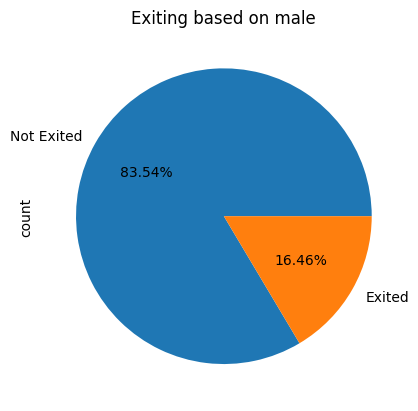

In [213]:
male_exits = only_male['Exited'].value_counts()
labels = ['Not Exited', 'Exited']
male_exits.plot(kind="pie", autopct='%.2f%%', labels=labels, title="Exiting based on male")
plt.show()

Text(0, 0.5, 'No.of customers coming in the Restaurant')

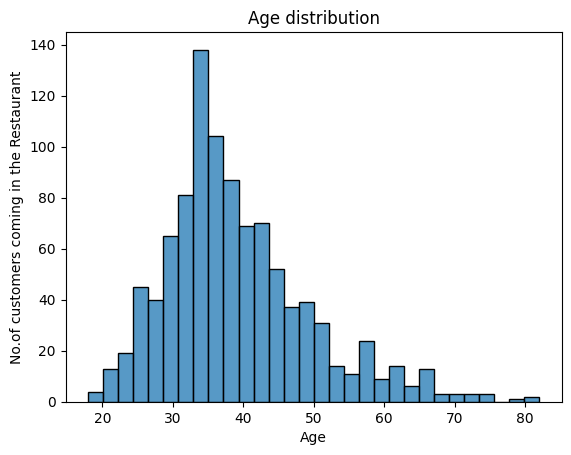

In [214]:
sns.histplot(df["Age"].head(1000),bins=30)
plt.title("Age distribution")
plt.ylabel("No.of customers coming in the Restaurant")

Text(0.5, 1.0, 'Products purchased')

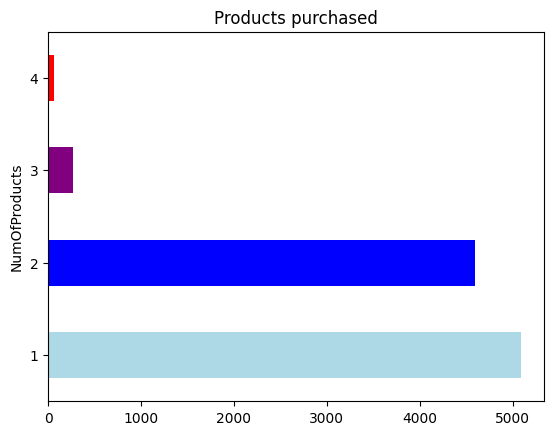

In [215]:
noofproducts=df["NumOfProducts"].value_counts()
color = ['lightblue', 'blue', 'purple', 'red']
noofproducts.plot(kind="barh",color=color)
plt.title("Products purchased")

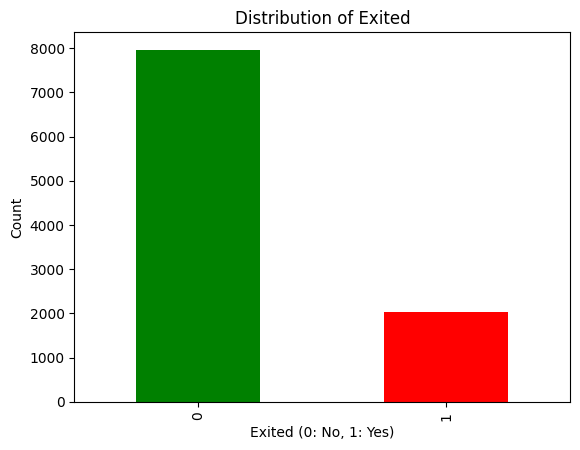

In [216]:
exit=df['Exited'].value_counts()
exit.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Exited')
plt.xlabel('Exited (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, ' ')

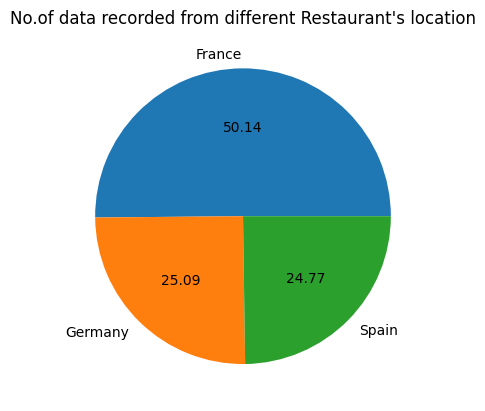

In [217]:
df["Geography"].value_counts().plot(kind="pie",autopct='%.2f',title="No.of data recorded from different Restaurant's location")
plt.ylabel(" ")

since most of the loyal customre are male they have also contributed more in the sales 

Text(0, 0.5, 'the amount spend by the customer')

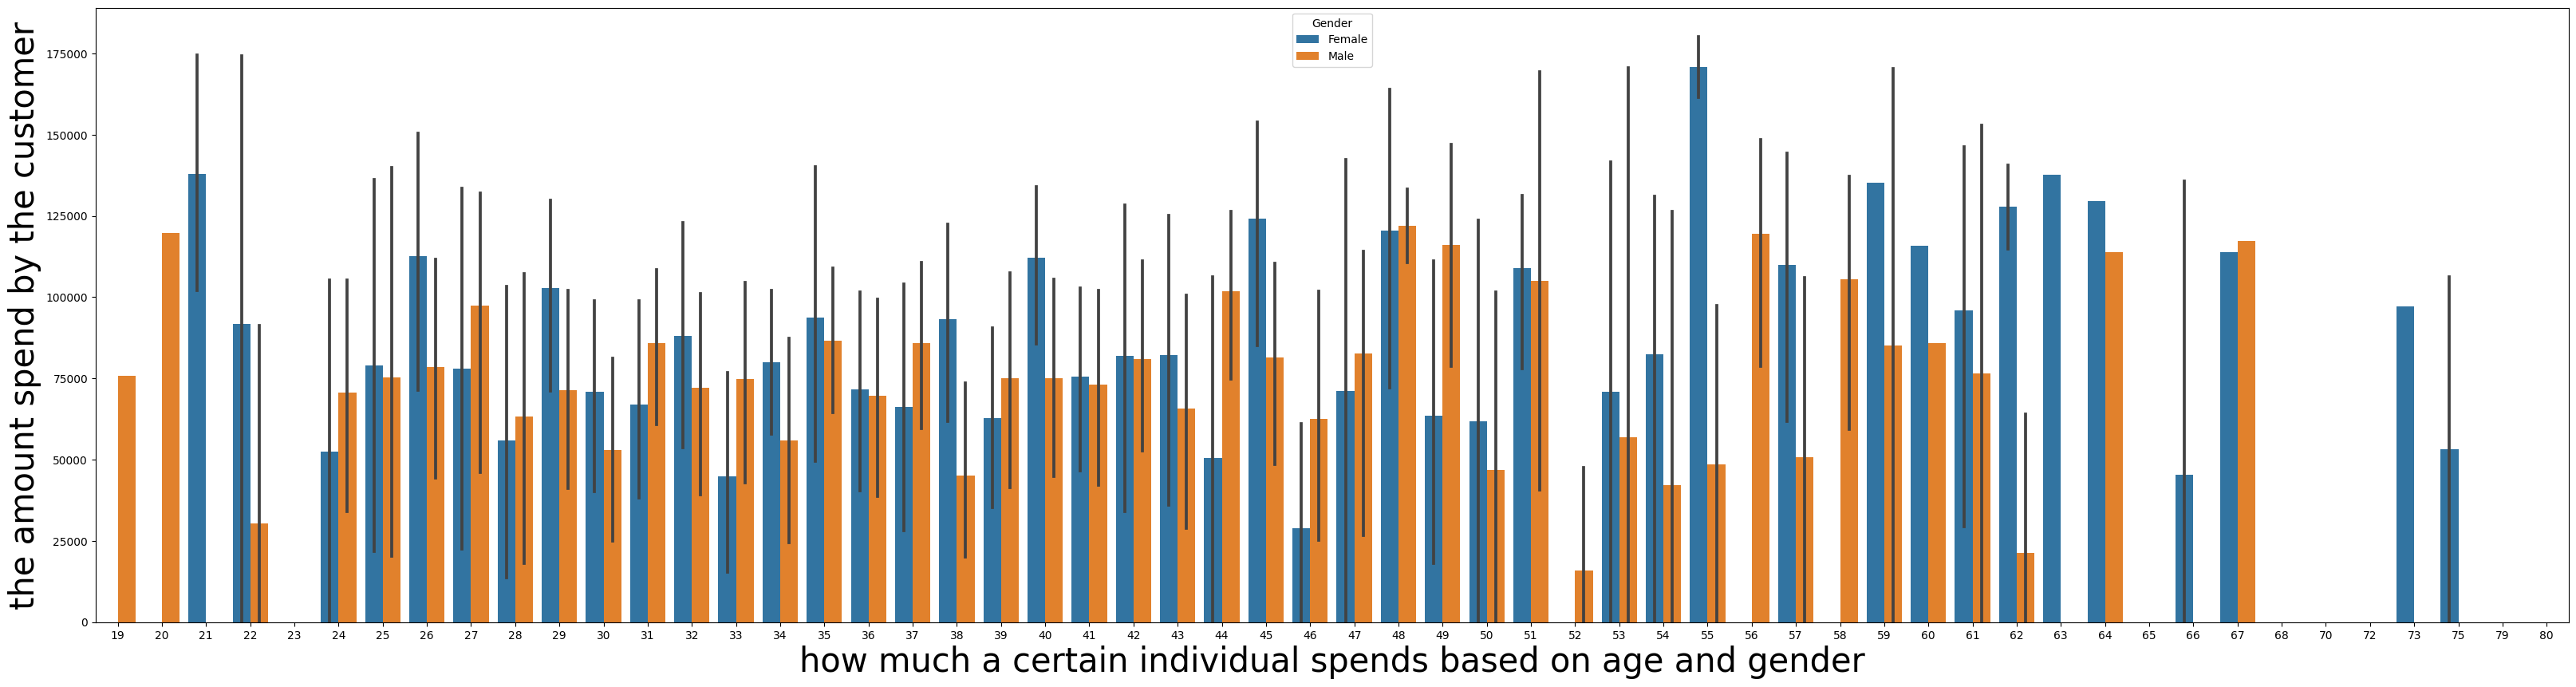

In [218]:
plt.figure(figsize=(40, 10))
sns.barplot(data=df,x=df["Age"].head(700),y=df["Balance"].head(700),hue=df["Gender"])
plt.xlabel("how much a certain individual spends based on age and gender",size="30")
plt.ylabel("the amount spend by the customer",size="30")

<Axes: xlabel='IsActiveMember', ylabel='Gender'>

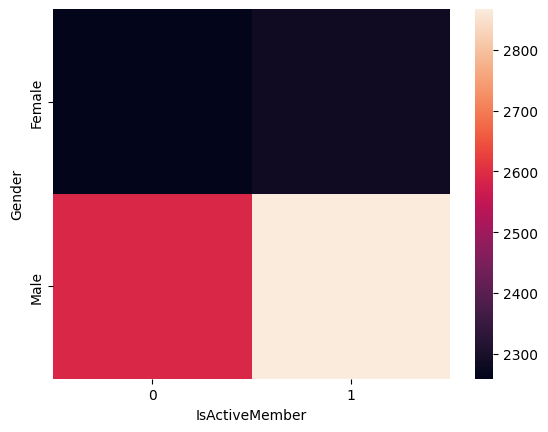

In [219]:
sns.heatmap(pd.crosstab(df["Gender"],df["IsActiveMember"]))

In [220]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [221]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [222]:
df.drop(columns=['RowNumber','CustomerId'],inplace=True)

In [223]:
df = pd.get_dummies(df, columns=['Gender','Geography'])
df

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,True,False,True,False,False
1,Hill,608,41,1,83807.86,1,0,1,112542.58,0,True,False,False,False,True
2,Onio,502,42,8,159660.80,3,1,0,113931.57,1,True,False,True,False,False
3,Boni,699,39,1,0.00,2,0,0,93826.63,0,True,False,True,False,False
4,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,False,True,True,False,False
9996,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,False,True,True,False,False
9997,Liu,709,36,7,0.00,1,0,1,42085.58,1,True,False,True,False,False
9998,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,True,False


In [225]:

df.drop(columns=['Gender_Male','Geography_France'],inplace=True)
df
                 

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Geography_Germany,Geography_Spain
0,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,Hill,608,41,1,83807.86,1,0,1,112542.58,0,True,False,True
2,Onio,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,Boni,699,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,False,False,False
9996,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,False,False,False
9997,Liu,709,36,7,0.00,1,0,1,42085.58,1,True,False,False
9998,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False


In [226]:
df['Gender_Female'] = df['Gender_Female'].astype(int)
df['Geography_Spain'] = df['Geography_Spain'].astype(int)
df['Geography_Germany'] = df['Geography_Germany'].astype(int)
df1=df.drop(columns=['Surname'])

In [227]:




X = df1.drop('Exited', axis=1)
y = df1['Exited']

X


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,1,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0


In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
print(X_test)

      RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
6252       6253    15687492          596   32       3   96709.07   
4684       4685    15736963          623   43       1       0.00   
1731       1732    15721730          601   44       4       0.00   
4742       4743    15762134          506   59       8  119152.10   
4521       4522    15648898          560   27       7  124995.98   
...         ...         ...          ...  ...     ...        ...   
6412       6413    15598982          602   53       5   98268.84   
8285       8286    15572631          609   25      10       0.00   
7853       7854    15746674          730   47       7       0.00   
1095       1096    15689081          692   29       4       0.00   
6929       6930    15651627          628   39       1  115341.19   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
6252              2          0               0         41788.37   
4684              2          1               1   

In [228]:
print(X_train)

[[ 1.4692775  -1.24645641  0.35649971 ... -0.91324755 -0.57946723
  -0.57638802]
 [-1.19499359  1.05381124 -0.20389777 ... -0.91324755  1.72572313
  -0.57638802]
 [-1.15724427  0.3664786  -0.96147213 ... -0.91324755 -0.57946723
   1.73494238]
 ...
 [ 0.13108128 -1.6259648   0.86500853 ...  1.09499335 -0.57946723
  -0.57638802]
 [-1.43776677  1.62852321  0.15932282 ... -0.91324755 -0.57946723
  -0.57638802]
 [ 0.78217054  0.21718071  0.47065475 ... -0.91324755  1.72572313
  -0.57638802]]


In [229]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Gender_Female      10000 non-null  int64  
 10  Geography_Germany  10000 non-null  int64  
 11  Geography_Spain    10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [230]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [231]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)
pred_lr = lr_classifier.predict(X_test)
lr_classifier.score(X_test,y_test)

0.8105

In [232]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, pred_lr)
print("Confusion Matrix of LR\n", cm_lr)

Confusion Matrix of LR
 [[1541   66]
 [ 313   80]]


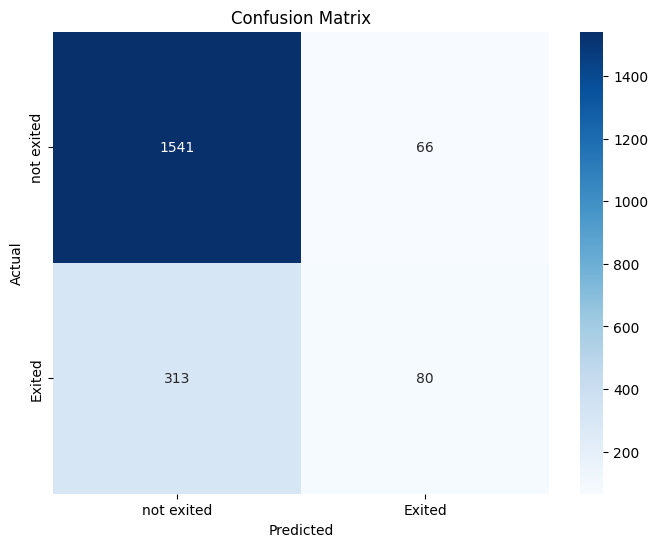

In [233]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['not exited', 'Exited'], yticklabels=['not exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [234]:
from sklearn.metrics import accuracy_score
acy_lr = accuracy_score(y_test, pred_lr)
print("Accuracy Score of LR\n", acy_lr)

Accuracy Score of LR
 0.8105


In [235]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
pred_knn = knn_classifier.predict(X_test)
knn_classifier.score(X_test, y_test)

0.8265

In [236]:
cm_knn = confusion_matrix(y_test, pred_knn)
print("Confusion Matrix of KNN\n", cm_knn)

Confusion Matrix of KNN
 [[1512   95]
 [ 252  141]]


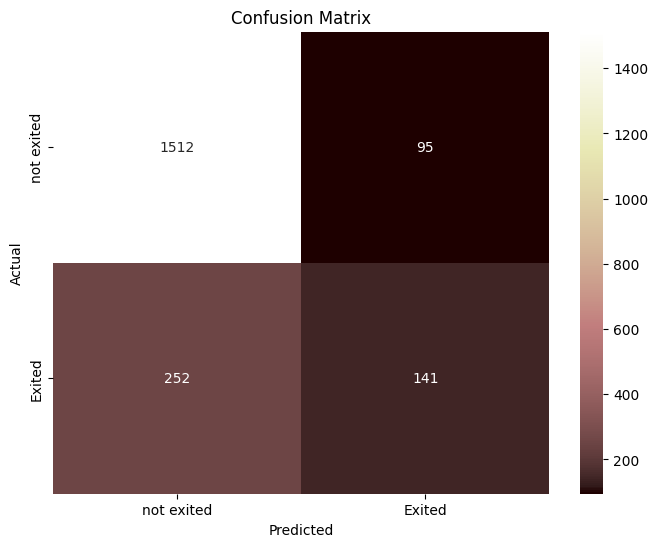

In [237]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='pink',xticklabels=['not exited', 'Exited'], yticklabels=['not exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [238]:
acy_knn = accuracy_score(y_test, pred_knn)
print("Accuracy Score of KNN\n", acy_knn)

Accuracy Score of KNN
 0.8265


In [239]:
from sklearn.svm import SVC
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
pred_svm = svm_classifier.predict(X_test)
svm_classifier.score(X_test, y_test)

0.8545

In [240]:
cm_svm = confusion_matrix(y_test, pred_svm)
print("Confusion Matrix of SVM\n", cm_svm)

Confusion Matrix of SVM
 [[1559   48]
 [ 243  150]]


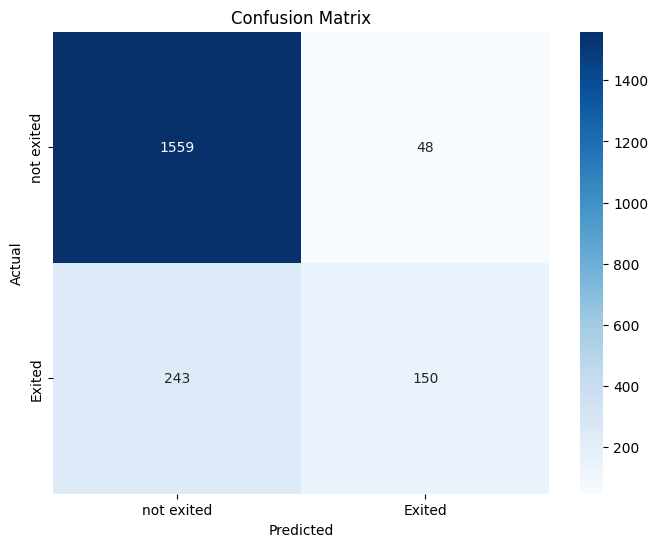

In [241]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues' ,xticklabels=['not exited', 'Exited'], yticklabels=['not exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [242]:
acy_svm = accuracy_score(y_test, pred_svm)
print("Accuracy Score of SVM\n", acy_svm)

Accuracy Score of SVM
 0.8545


In [243]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)
pred_rf = rf_classifier.predict(X_test)
rf_classifier.score(X_test, y_test)

0.8665

In [244]:
cm_rf = confusion_matrix(y_test, pred_rf)
print("Confusion Matrix of RF\n", cm_rf)

Confusion Matrix of RF
 [[1548   59]
 [ 208  185]]


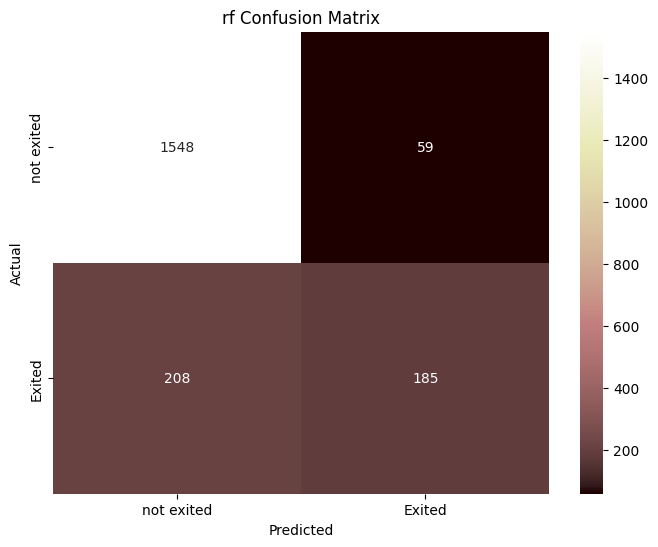

In [245]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='pink',xticklabels=['not exited', 'Exited'], yticklabels=['not exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('rf Confusion Matrix')
plt.show()

In [246]:
acy_rf = accuracy_score(y_test, pred_rf)
print("Accuracy Score of RF\n", acy_rf)

Accuracy Score of RF
 0.8665


In [247]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)
pred_dt = dt_classifier.predict(X_test)
dt_classifier.score(X_test, y_test)

0.7945

In [248]:
cm_dt = confusion_matrix(y_test, pred_dt)
print("Confusion Matrix of DT\n", cm_dt)

Confusion Matrix of DT
 [[1377  230]
 [ 181  212]]


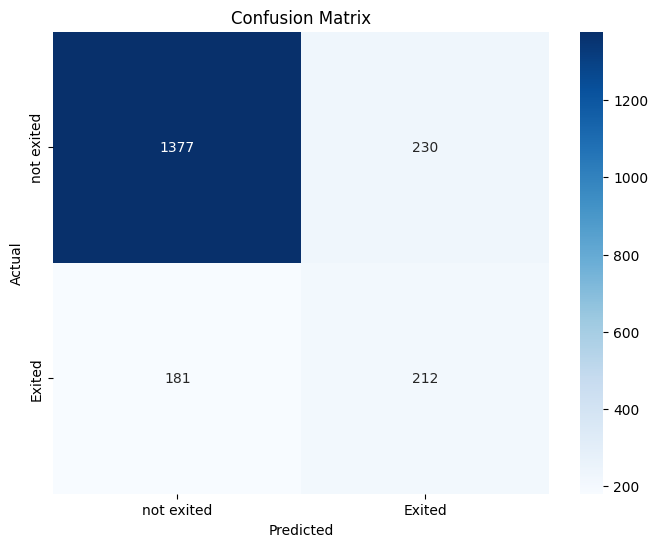

In [249]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',xticklabels=['not exited', 'Exited'], yticklabels=['not exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [250]:
acy_dt = accuracy_score(y_test, pred_dt)
print("Accuracy Score of DT\n", acy_dt)

Accuracy Score of DT
 0.7945


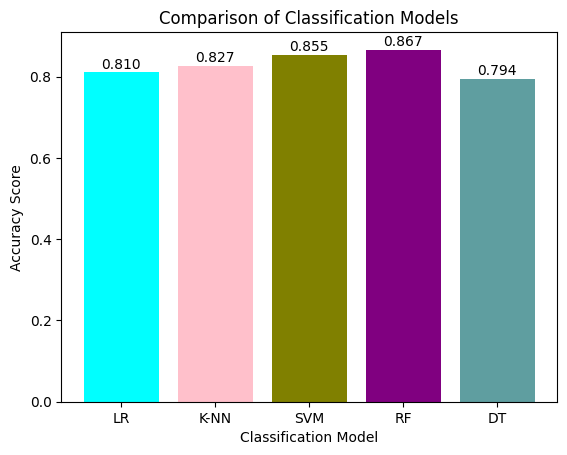

In [251]:
models = ['LR', 'K-NN', 'SVM', 'RF', 'DT']
accuracy_scores = [acy_lr, acy_knn, acy_svm, acy_rf, acy_dt]
plt.bar(models, accuracy_scores, color=['cyan', 'pink', 'olive', 'purple', 'cadetblue'])
plt.xlabel('Classification Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Classification Models')
for i,v in enumerate(accuracy_scores):
  plt.text(i,v+0.02,f'{v:.3f}',ha='center',va='center')
plt.show()

In [262]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X_train, y_train)

train_predictions = model1.predict(X_train)
test_predictions = model1.predict(X_test)
y_pred = model1.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("r-score:", r2)

Mean Squared Error: 0.13306037414347205
r-score: 0.15724700527132685


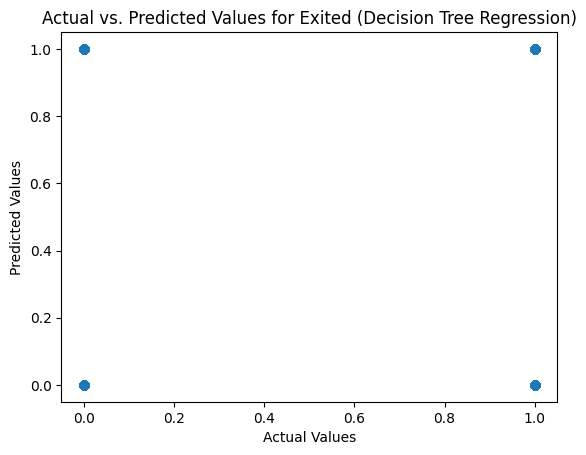

In [263]:
from sklearn.tree import DecisionTreeRegressor


model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, y_train)

y_pred_tree = model_tree.predict(X_test)

plt.scatter(y_test, y_pred_tree)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Exited (Decision Tree Regression)')
plt.show()


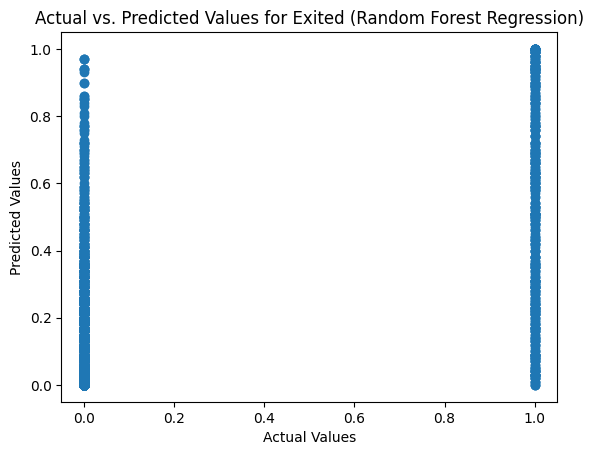

In [264]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Exited (Random Forest Regression)')
plt.show()
